### libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import f1_score , accuracy_score , roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.shape

(299, 13)

In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


we will correct the signs

In [7]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)

### Data visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


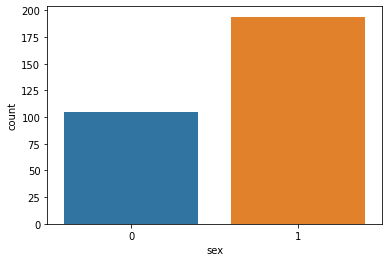

In [8]:
sns.countplot(data['sex']);

 In our dataset, the number of male readings exceeds the number of female readings.


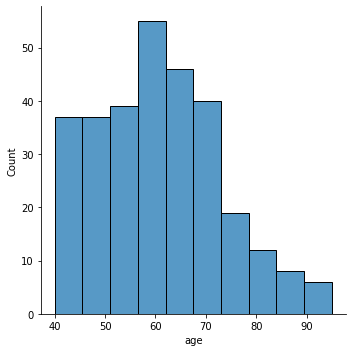

In [9]:
sns.displot(data['age']);

In [10]:
data['age'].describe()

count    299.000000
mean      60.829431
std       11.894997
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [11]:
np.median(data['age'])

60.0

 The median and mean values are close, so we can say that the average age of the people in our dataset is 60 years



## Feature correlation

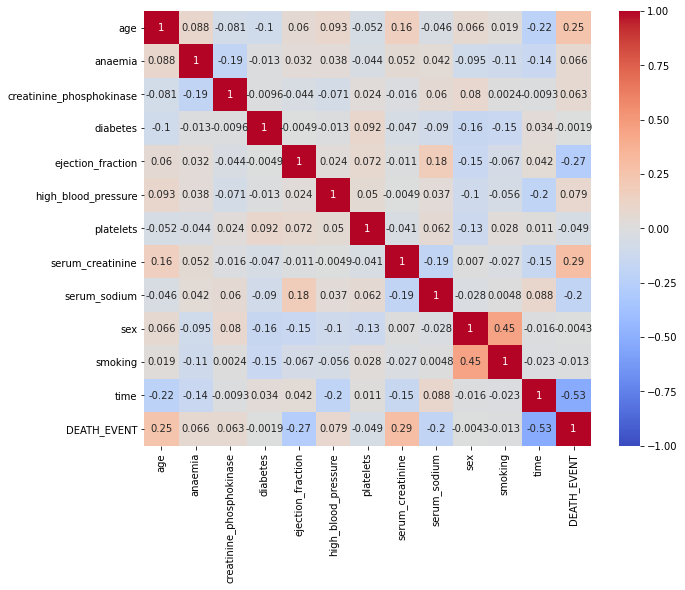

In [12]:
corr = data.corr()
ax , fig  = plt.subplots(figsize =(10 , 8 ))
sns.heatmap(corr ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()

In [13]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253581
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

Let's highlight the features that have a positive correlation close to zero

### Modeling and Optimization 

In [14]:
X = data.drop(columns= 'DEATH_EVENT')
y = data['DEATH_EVENT']

In [15]:
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2)

In [16]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression 

In [17]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [18]:
s1 = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("Linear Regression accuracy_score :", "{:.2f}%".format(100*s1),'\n'
      'Linear Regression f1-score : ', "{:.2f}%".format(100*f1))

Linear Regression accuracy_score : 83.33% 
Linear Regression f1-score :  76.19%


In [19]:
params = {
    'C' : [1,2,3,4,5,6,7,8,9,10,11],
    'penalty' : ['l1' , 'l2'],
    'max_iter' : [100,500]
}

In [20]:
model_cv = GridSearchCV(model , params , cv = 10 , n_jobs= -1)
model_cv.fit(X_train, y_train)
y_pred_cv = model_cv.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.81231884        nan 0.81231884        nan 0.81231884
        nan 0.81231884        nan 0.81231884        nan 0.81231884
        nan 0.81231884        nan 0.81231884        nan 0.80398551
        nan 0.81231884        nan 0.79981884        nan 0.81231884
        nan 0.80398551        nan 0.81231884        nan 0.78731884
        nan 0.80398551        nan 0.78731884        nan 0.80815217
        nan 0.78731884        nan 0.80398551        nan 0.78731884
        nan 0.79565217]
  category=UserWarning


In [21]:
s1_cv = accuracy_score(y_test,y_pred_cv)
f1_cv = f1_score(y_test,y_pred_cv)
print("Linear Regression accuracy_score :", "{:.2f}%".format(100*s1_cv),'\n'
      'Linear Regression f1-score : ', "{:.2f}%".format(100*f1_cv))

Linear Regression accuracy_score : 83.33% 
Linear Regression f1-score :  76.19%


### Random forest classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
y_pred_rf = RF_model.predict(X_test)

In [24]:
s1_rf = accuracy_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)
print("Random Forest Classifier accuracy_score :", "{:.2f}%".format(100*s1_rf),'\n'
      'Random Forest Classifier f1-score : ', "{:.2f}%".format(100*f1_rf))

Random Forest Classifier accuracy_score : 85.00% 
Random Forest Classifier f1-score :  76.92%
